In [15]:
from deepface import DeepFace 
import cv2
from matplotlib import pyplot as plt
import random as rd
import os

import firebase_admin
from firebase_admin import credentials as crd
from firebase_admin import storage, db

from google.cloud import storage as strg
from google.oauth2 import service_account
import datetime

In [5]:
model_name = 'VGG-Face'


In [3]:
credentials = service_account.Credentials.from_service_account_file('serviceAccountKey.json')
client = strg.Client(credentials=credentials, project='face-atendance')

In [4]:
if not firebase_admin._apps:
    cred = crd.Certificate("serviceAccountKey.json")
    firebase_admin.initialize_app(cred, {
        'storageBucket': 'face-atendance.appspot.com',
        "databaseURL": "https://face-atendance-default-rtdb.europe-west1.firebasedatabase.app/"
    }, name='strga')
else:
    print("Sorry")

In [47]:
bucket = client.get_bucket('face-atendance.appspot.com')

blobs = bucket.list_blobs()

for blob in blobs:
    filename = os.path.join('deleted', blob.name.split('/')[-1])
    if os.path.exists('deleted/' + filename):
        pass
    else:
        blob.download_to_filename(filename)
    print(blob)

<Blob: face-atendance.appspot.com, 19B030067.png, 1683371441407925>
<Blob: face-atendance.appspot.com, 19B030068.png, 1682605308535634>
<Blob: face-atendance.appspot.com, 19B030222.png, 1683370830447113>
<Blob: face-atendance.appspot.com, 19B030291.png, 1683370902581558>


In [48]:
img_path1 = 'images/bekai.jpg'
img_path2 = 'images/july21.png'

In [6]:
models = ["Facenet", "OpenFace", "DeepFace", "DeepID", "Dlib", "ArcFace", "Dlib"]
# for model in models:
#     DeepFace.build_model(model)

In [49]:
# if os.path.exists('deleted/representations_vgg_face.pkl') == True:
#   os.remove('deleted/representations_vgg_face.pkl')
res = DeepFace.find(img_path1, db_path='deleted', model_name=model_name, enforce_detection=False)

Finding representations: 100%|██████████| 3/3 [00:02<00:00,  1.00it/s]


There are  55  representations found in  representations_vgg_face.pkl
find function lasts  15.946008682250977  seconds


In [21]:
ver = DeepFace.verify(img_path1, "deleted/19B030222.png", model_name=model_name)
print(ver)

ValueError: Confirm that deleted/19B030222.png exists

In [50]:
extracted = DeepFace.extract_faces(img_path1, enforce_detection=False)
# extracted1 = DeepFace.extract_faces(img_path2)

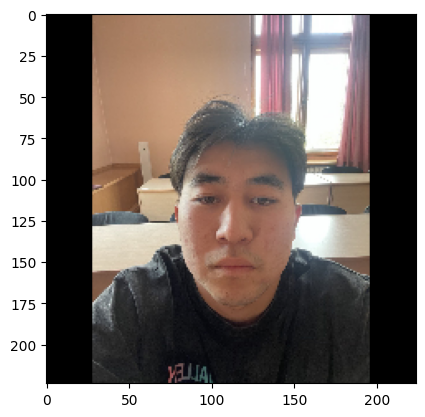

In [51]:
plt.imshow(extracted[0]['face'])

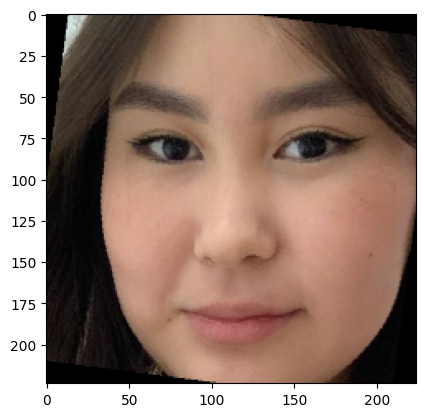

In [52]:
plt.imshow(extracted1[0]['face'])


In [52]:

res

[                    identity  source_x  source_y  source_w  source_h  \
 0    deleted\19B030222/4.png         0         0       960      1280   
 1   deleted\19B030067/15.png         0         0       960      1280   
 2    deleted\19B030067/5.png         0         0       960      1280   
 3   deleted\19B030222/11.png         0         0       960      1280   
 4    deleted\19B030291/4.png         0         0       960      1280   
 5    deleted\19B030067/8.png         0         0       960      1280   
 6    deleted\19B030291/8.png         0         0       960      1280   
 7    deleted\19B030291/1.png         0         0       960      1280   
 8   deleted\19B030222/12.png         0         0       960      1280   
 9    deleted\19B030291/1.png         0         0       960      1280   
 10   deleted\19B030067/9.png         0         0       960      1280   
 11  deleted\19B030067/10.png         0         0       960      1280   
 12   deleted\19B030067/2.png         0         0  

In [53]:
try:
  img_path_extracted = res[0].iloc[0]['identity']
  print(img_path_extracted.replace("\\", "/"), res[0].iloc[0])
except:
  print("Empty data frame")

deleted/19B030222/4.png identity           deleted\19B030222/4.png
source_x                                 0
source_y                                 0
source_w                               960
source_h                              1280
VGG-Face_cosine                   0.192763
Name: 0, dtype: object


In [54]:
isNotDetected = False
try:
  DeepFace.extract_faces(img_path1)
  verified = DeepFace.verify(img_path1, img_path_extracted, model_name=model_name)
  if verified['verified']:
    print("Detected")
  else: 
    print("Not detected")
except:
  isNotDetected = True
  print("Face is not detected")

if isNotDetected:
  print("Rodnoi, no way")
else:
  print(verified)

Face is not detected
Rodnoi, no way


In [122]:
filename = res[0].iloc[0]['identity']
if filename.count('deleted') > 0:
  img_id = filename.split("/")[0].split("\\")[1]
else:
  img_id = filename.split("/")[1].split(".")[0]

# print(filename)
print(img_id)

19B030067


In [26]:
try:
  app = firebase_admin.get_app()
except ValueError:
  cred = crd.Certificate("serviceAccountKey.json")
  firebase_admin.initialize_app(cred, {
      'storageBucket': 'face-atendance.appspot.com',
      "databaseURL": "https://face-atendance-default-rtdb.europe-west1.firebasedatabase.app/"
  })
  print("Initialize")


Initialize


In [ ]:
DeepFace.

In [34]:
app.credential

In [123]:
ref = db.reference('persons')

data = ref.child(img_id).get()

print(data['firstname'], data['lastname'])

Damir Yessenbek
